In [1]:
!git clone https://github.com/iserranoz/up_econometria.git

Cloning into 'up_econometria'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 38 (delta 2), reused 8 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (38/38), 3.38 MiB | 3.55 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [2]:
import pandas as pd
df = pd.read_parquet('/content/up_econometria/data_enigh_2.parquet')
df.head()

,antiguedad,cuart_dorm,num_cuarto,bano_comp,focos_ahor,tot_resid,tot_hom,tot_muj,renta,estado,municipio
0,15,3,5,3,9,2,1,1,8500,Aguascalientes,Aguascalientes
1,25,2,4,1,10,4,2,2,4800,Aguascalientes,Aguascalientes
2,45,2,4,2,5,4,1,3,1900,Aguascalientes,Aguascalientes
3,40,3,6,1,8,3,3,0,1500,Aguascalientes,Aguascalientes
4,50,3,5,1,0,1,0,1,2500,Aguascalientes,Aguascalientes


In [10]:
#Eliminamos las columnas que actualmente son de tio string, ya que las volveremos dummies más adelante

df = df.drop(columns=['estado', 'municipio'])
df.head()

,antiguedad,cuart_dorm,num_cuarto,bano_comp,focos_ahor,tot_resid,tot_hom,tot_muj,renta
0,15,3,5,3,9,2,1,1,8500
1,25,2,4,1,10,4,2,2,4800
2,45,2,4,2,5,4,1,3,1900
3,40,3,6,1,8,3,3,0,1500
4,50,3,5,1,0,1,0,1,2500


In [11]:
import statsmodels.formula.api as sm

formula = 'renta ~ ' + ' + '.join(df_numerico.drop(columns=['renta']).columns)
model = sm.ols(formula=formula, data=df_numerico).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  renta   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                 -0.100
Method:                 Least Squares   F-statistic:                    0.8966
Date:                Fri, 20 Sep 2024   Prob (F-statistic):              0.674
Time:                        04:59:32   Log-Likelihood:                 6.0709
No. Observations:                   9   AIC:                             3.858
Df Residuals:                       1   BIC:                             5.436
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1985      0.979      1.225      0.4

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


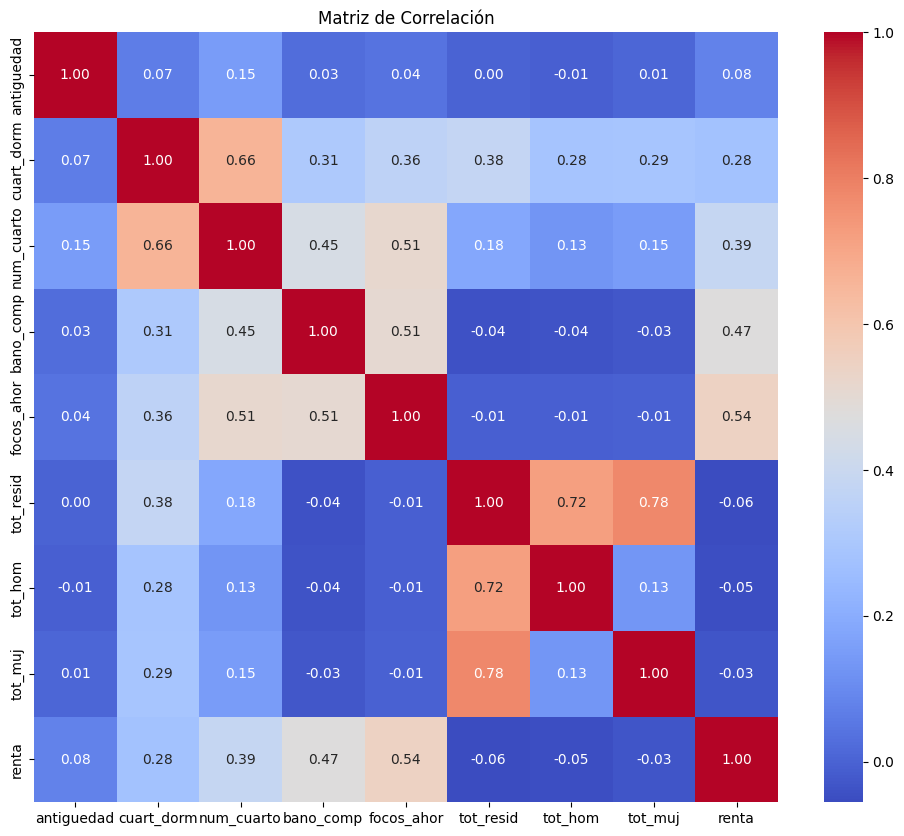

In [12]:

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [13]:
#Se puede observar que existe una correlación lineal alta entre hombres y total de residentes, así como mujeres y total de residentes.
#De aquí que esa variable es la combinación lineal de las otras, por lo que a continuación para aclara la sospecha generemos una regresion lineal multiple tomando
#como variable dependiente total de hombres

df2 = df.drop(columns=['renta'])
df2.head()

formula = 'tot_resid ~ ' + ' + '.join(df2.drop(columns=['tot_resid']).columns)
model = sm.ols(formula=formula, data=df_numerico).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              tot_resid   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.495e+28
Date:                Fri, 20 Sep 2024   Prob (F-statistic):           6.30e-15
Time:                        05:03:04   Log-Likelihood:                 296.49
No. Observations:                   9   AIC:                            -577.0
Df Residuals:                       1   BIC:                            -575.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    6.12e-15   9.47e-15      0.646      0.6

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


In [14]:
#De aquí vemos que la R2 es de 1, por lo que en efecto esta variable es una combinación
#lineal de otras, por lo que la eliminamos del dataset

df = df.drop(columns=['tot_resid'])
df.head()

,antiguedad,cuart_dorm,num_cuarto,bano_comp,focos_ahor,tot_hom,tot_muj,renta
0,15,3,5,3,9,1,1,8500
1,25,2,4,1,10,2,2,4800
2,45,2,4,2,5,1,3,1900
3,40,3,6,1,8,3,0,1500
4,50,3,5,1,0,0,1,2500


In [15]:
#Nuevamente ejecutamos la regresion lineal

formula = 'renta ~ ' + ' + '.join(df.drop(columns=['renta']).columns)
model = sm.ols(formula=formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  renta   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     373.8
Date:                Fri, 20 Sep 2024   Prob (F-statistic):               0.00
Time:                        05:04:47   Log-Likelihood:                -42677.
No. Observations:                4690   AIC:                         8.537e+04
Df Residuals:                    4682   BIC:                         8.542e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -289.6957    108.273     -2.676      0.0

{'LM Statistic': 332.06152327022903, 'LM-Test p-value': 8.495727718088196e-68, 'F-Statistic': 50.96485939241222, 'F-Test p-value': 2.3733593059417202e-70}


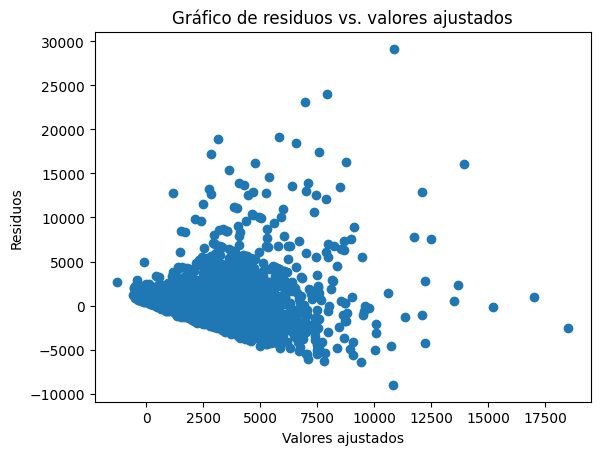

In [17]:

import statsmodels.stats.api as sms
residuals = model.resid

# Realizar la prueba de Breusch-Pagan para heterocedasticidad
breusch_pagan_test = sms.het_breuschpagan(residuals, model.model.exog)

# Imprimir los resultados de la prueba
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, breusch_pagan_test)))

# Interpretar los resultados
# Si el p-valor es menor que el nivel de significancia (por ejemplo, 0.05),
# se rechaza la hipótesis nula de homocedasticidad y se concluye que hay heterocedasticidad.
# Si el p-valor es mayor que el nivel de significancia, no se rechaza la hipótesis nula
# y se concluye que no hay evidencia de heterocedasticidad.

# También se puede visualizar la heterocedasticidad graficando los residuos
# frente a los valores ajustados o las variables predictoras.
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos vs. valores ajustados')
plt.show()


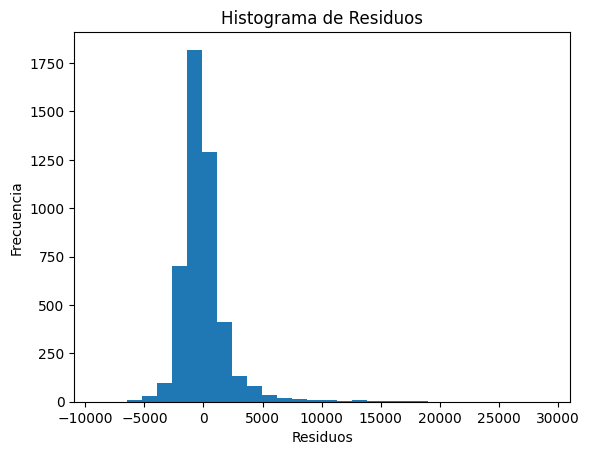

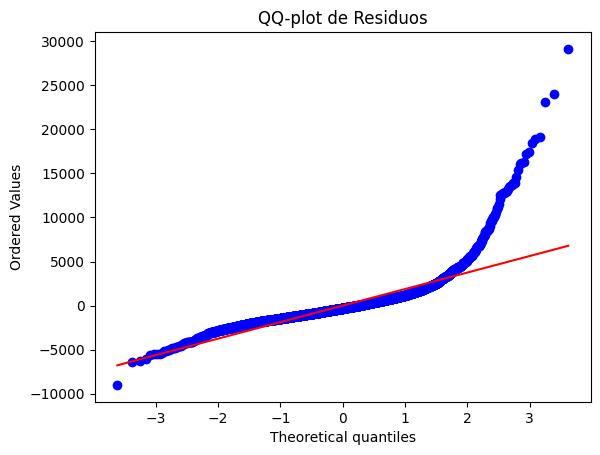

In [18]:
# prompt: grafica el histograma y  qqplot sobre los reisudos de la regresion

import scipy.stats as stats

# Histograma de los residuos
plt.hist(residuals, bins=30)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()

# QQ-plot de los residuos
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ-plot de Residuos')
plt.show()


In [20]:
import numpy as np

df['renta_log'] = np.log(df['renta'])

In [21]:

formula = 'renta_log ~ ' + ' + '.join(df.drop(columns=['renta', 'renta_log']).columns)
model = sm.ols(formula=formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              renta_log   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     391.3
Date:                Fri, 20 Sep 2024   Prob (F-statistic):               0.00
Time:                        05:13:39   Log-Likelihood:                -3937.1
No. Observations:                4690   AIC:                             7890.
Df Residuals:                    4682   BIC:                             7942.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7580      0.028    241.327      0.0

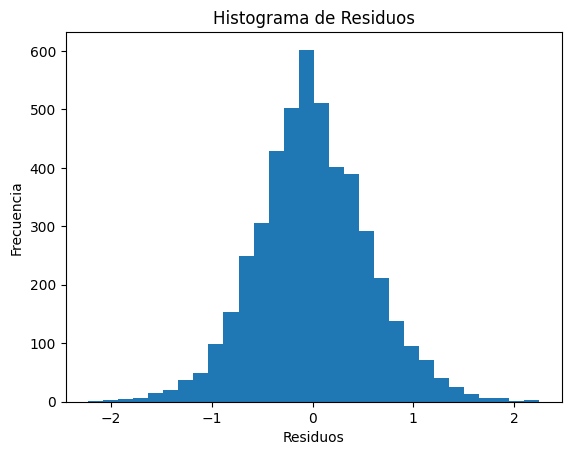

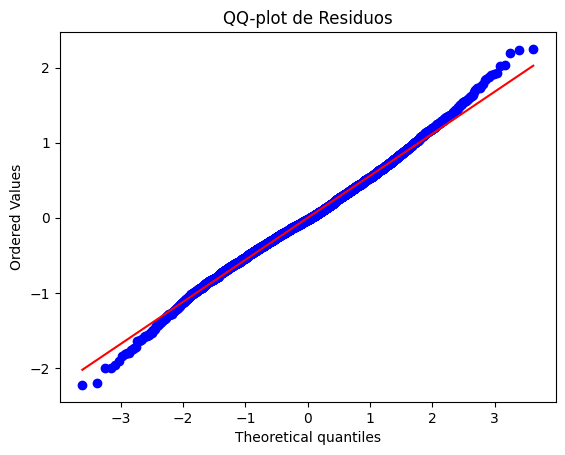

In [23]:
# prompt: grafica el histograma y  qqplot sobre los reisudos de la regresion

import scipy.stats as stats

residuals = model.resid

# Histograma de los residuos
plt.hist(residuals, bins=30)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()

# QQ-plot de los residuos
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ-plot de Residuos')
plt.show()

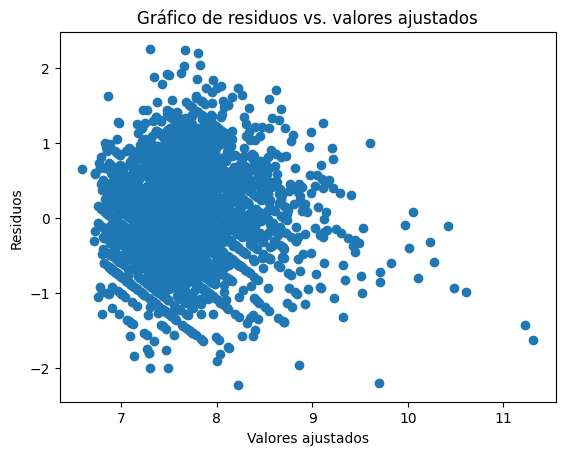

In [25]:
#Gráfica de residus vs valores ajustados para comprobar hetorecedasticidad


plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos vs. valores ajustados')
plt.show()